In [77]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random as rnd
from scipy.stats import zscore

In [2]:
data = pd.read_csv("Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [4]:
data.tail(35)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
38437,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-25,2374.0,31646.0,1075.0
38438,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-26,3061.0,32004.0,1103.0
38439,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-27,3666.0,32304.0,1122.0
38440,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-28,4164.0,32646.0,1160.0
38441,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-29,4252.0,32952.0,1178.0
38442,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-30,1985.0,33273.0,1193.0
38443,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-01-31,1762.0,33388.0,1217.0
38444,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-01,2433.0,33548.0,1234.0
38445,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-02,4160.0,33814.0,1254.0
38446,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-03,2829.0,33964.0,1269.0


In [5]:
data.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [6]:
data.index

RangeIndex(start=0, stop=38472, step=1)

In [7]:
data=data.fillna(0)

In [8]:
countries_stats= data.drop_duplicates(ignore_index=True, subset=['Entity', 'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)'])

countries_stats=countries_stats.drop(['Date', 'Daily tests','Cases', 'Deaths'],axis=1)
countries_stats=countries_stats.rename(columns={"Entity":"Country"})
countries_stats=countries_stats.set_index("Country")


In [99]:
print(countries_stats.shape)
for country in countries_stats.index:
    print(country)

(104, 10)
Albania
Algeria
Argentina
Armenia
Australia
Austria
Bahrain
Bangladesh
Belarus
Belgium
Bhutan
Bolivia
Bosnia and Herzegovina
Bulgaria
Canada
Cape Verde
Chile
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Denmark
Dominican Republic
Ecuador
El Salvador
Estonia
Ethiopia
Fiji
Finland
France
Ghana
Greece
Guatemala
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Latvia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Malta
Mauritania
Mexico
Mongolia
Morocco
Mozambique
Myanmar
Namibia
Nepal
New Zealand
Nigeria
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saudi Arabia
Senegal
Serbia
Slovakia
Slovenia
South Africa
South Korea
Sri Lanka
Sweden
Switzerland
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Vietnam
Zambia
Zimbabwe


In [71]:
data_days_stats={}
for country in countries_stats.index:
    single_country=data.loc[data['Entity']==country]
    single_country=single_country[['Date','Daily tests','Cases','Deaths']]
    single_country=single_country.set_index("Date")
    data_days_stats[country]=  single_country

In [85]:
data_days_stats.info()

AttributeError: 'dict' object has no attribute 'info'

In [73]:
for country in data_days_stats.values():
    country["Daily cases"]=country['Cases'].diff(1)
    country["Daily deaths"]=country['Deaths'].diff(1)
   

In [86]:
for country,dataframes in data_days_stats.items():    
    data_days_stats[country]=dataframes.fillna(0)
    print(country,data_days_stats[country].describe())

Albania        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean   1170.264865   22774.275676   464.572973   289.640541      4.854054
std    1197.952531   29178.287865   514.300347   334.345971      5.134537
min       0.000000       0.000000     0.000000     0.000000      0.000000
25%     252.000000    1056.500000    33.000000    23.000000      1.000000
50%     808.500000    9139.000000   268.500000   132.500000      3.500000
75%    1903.250000   36653.750000   783.000000   536.500000      7.000000
max    4562.000000  107167.000000  1796.000000  1239.000000     21.000000
Algeria        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean      8.378378   45655.018919  1480.656757   305.651351      8.062162
std     131.944258   38532.818754   966.709564   245.125276      5.072795
min       0.000000    

Ecuador         Daily tests          Cases        Deaths   Daily cases  Daily deaths
count    365.000000     365.000000    365.000000    365.000000    365.000000
mean    2499.347945  117379.501370   8049.150685    783.969863     43.317808
std     2138.031889   84993.499389   5472.049462    963.501893    204.608411
min    -3743.000000       6.000000      0.000000  -7953.000000      0.000000
25%      941.000000   39098.000000   3358.000000    305.000000     10.000000
50%     2099.000000  112141.000000   6555.000000    721.000000     24.000000
75%     3656.000000  192117.000000  13423.000000   1111.000000     43.000000
max    12181.000000  286155.000000  15811.000000  11536.000000   3852.000000
El Salvador        Daily tests         Cases       Deaths  Daily cases  Daily deaths
count   347.000000    347.000000   347.000000   347.000000    347.000000
mean   1432.121037  24727.331412   714.158501   172.521614      5.342939
std    1217.893672  19304.028551   577.243230   199.979830      3.95

Kenya         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    353.000000     353.000000   353.000000   353.000000    353.000000
mean    1620.254958   42033.147309   743.470255   300.203966      5.257790
std     2291.706523   38657.004296   670.386659   322.429447      5.996102
min        0.000000       1.000000     0.000000     0.000000      0.000000
25%        0.000000    2989.000000    88.000000    75.000000      1.000000
50%        0.000000   35020.000000   594.000000   178.000000      3.000000
75%     3090.000000   85130.000000  1484.000000   421.000000      7.000000
max    19403.000000  105973.000000  1856.000000  1554.000000     41.000000
Kuwait         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    371.000000     371.000000   371.000000   371.000000    371.000000
mean    4144.301887   82777.619946   511.824798   514.423181      2.919137
std     3142.363786   60802.387069   355.218158   293.022915      2.540256
min        0

Peru         Daily tests         Cases        Deaths   Daily cases  Daily deaths
count    360.000000  3.600000e+02    360.000000    360.000000    360.000000
mean    7307.552778  5.888846e+05  22425.416667   3677.394444    128.608333
std     7735.425651  4.182421e+05  15708.347294   3562.351698    307.872599
min        0.000000  1.000000e+00      0.000000      0.000000      0.000000
25%     2233.750000  1.821270e+05   4996.750000    690.500000     14.000000
50%     5457.500000  6.545830e+05  29006.000000   3220.000000     95.000000
75%     8538.250000  9.627988e+05  35933.750000   5549.750000    180.000000
max    37478.000000  1.323863e+06  46299.000000  21358.000000   4143.000000
Philippines         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    396.000000     396.000000    396.00000   396.000000    396.000000
mean   20611.310606  213144.606061   4238.40404  1455.431818     31.106061
std    14557.603324  205062.551942   3980.93321  1286.457297     36.115551

Ukraine         Daily tests         Cases        Deaths   Daily cases  Daily deaths
count    363.000000  3.630000e+02    363.000000    363.000000    363.000000
mean   13103.465565  3.874146e+05   7246.415978   3844.426997     75.493113
std    15222.584727  4.697755e+05   8643.930097   4132.469067     78.462799
min        0.000000  1.000000e+00      0.000000      0.000000      0.000000
25%        0.000000  2.472850e+04    728.500000    525.000000     13.000000
50%     9119.000000  1.241320e+05   2605.000000   2253.000000     35.000000
75%    22014.000000  7.472240e+05  12672.000000   5913.500000    129.000000
max    84054.000000  1.395528e+06  27404.000000  16585.000000    297.000000
United Arab Emirates          Daily tests          Cases       Deaths  Daily cases  Daily deaths
count     397.000000     397.000000   397.000000   397.000000    397.000000
mean    76206.833753  100407.370277   381.735516   986.196474      3.075567
std     56005.185886  102218.857295   288.996676  1010.9034

In [87]:
for country,dataframes in data_days_stats.items():    

    print(country,data_days_stats[country].median())

Albania Daily tests      808.5
Cases           9139.0
Deaths           268.5
Daily cases      132.5
Daily deaths       3.5
dtype: float64
Algeria Daily tests         0.0
Cases           43209.5
Deaths           1479.0
Daily cases       237.5
Daily deaths        8.0
dtype: float64
Argentina Daily tests      12476.5
Cases           257389.5
Deaths            4884.0
Daily cases       4857.0
Daily deaths        84.5
dtype: float64
Armenia Daily tests         0.0
Cases           43750.0
Deaths            877.0
Daily cases       265.0
Daily deaths        6.0
dtype: float64
Australia Daily tests     15753.5
Cases           22550.0
Deaths            368.0
Daily cases        15.0
Daily deaths        0.0
dtype: float64
Austria Daily tests     10499.0
Cases           26475.5
Deaths            733.0
Daily cases       410.5
Daily deaths        5.5
dtype: float64
Bahrain Daily tests      8417.0
Cases           50756.0
Deaths            188.0
Daily cases       322.0
Daily deaths        1.0
dtype: flo

Zimbabwe Daily tests      757.5
Cases           7408.5
Deaths           220.0
Daily cases       29.0
Daily deaths       0.0
dtype: float64


C:\Users\Andreas\AppData\Local\Temp\ipykernel_16620\4137842890.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for country,dataframes in rnd.sample(data_days_stats.items(),1):


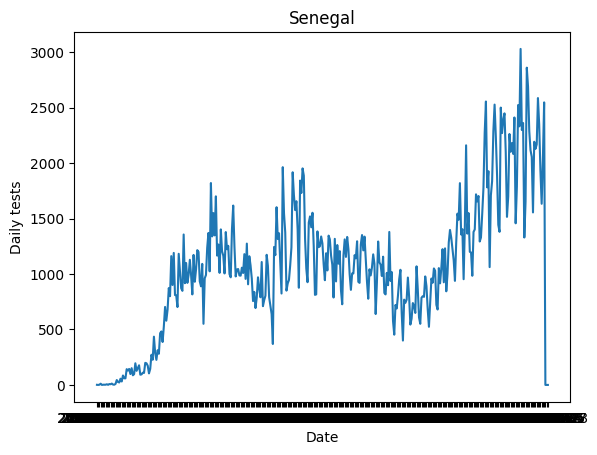

In [89]:
for country,dataframes in rnd.sample(data_days_stats.items(),1): 
   
    sns.lineplot(data=dataframes,x=dataframes.index,y='Daily tests').set(title=country)
    

In [100]:
print(data_days_stats['Malta'].head(40))
print(data_days_stats['Malta'].tail(40))

            Daily tests  Cases  Deaths  Daily cases  Daily deaths
Date                                                             
2020-02-25         29.0    0.0     0.0          0.0           0.0
2020-02-26         50.0    0.0     0.0          0.0           0.0
2020-02-27         14.0    0.0     0.0          0.0           0.0
2020-02-28         10.0    0.0     0.0          0.0           0.0
2020-02-29          7.0    0.0     0.0          0.0           0.0
2020-03-01          8.0    0.0     0.0          0.0           0.0
2020-03-02          5.0    0.0     0.0          0.0           0.0
2020-03-03         22.0    0.0     0.0          0.0           0.0
2020-03-04         42.0    0.0     0.0          0.0           0.0
2020-03-05         31.0    0.0     0.0          0.0           0.0
2020-03-06         63.0    0.0     0.0          0.0           0.0
2020-03-07         98.0    3.0     0.0          3.0           0.0
2020-03-08        118.0    3.0     0.0          0.0           0.0
2020-03-09

In [105]:
print(data_days_stats['France'].head(50))
print(data_days_stats['France'].tail(50))

            Daily tests   Cases  Deaths  Daily cases  Daily deaths
Date                                                              
2020-01-24          0.0     2.0     0.0          0.0           0.0
2020-01-25          0.0     3.0     0.0          1.0           0.0
2020-01-26          0.0     3.0     0.0          0.0           0.0
2020-01-27          0.0     3.0     0.0          0.0           0.0
2020-01-28          0.0     4.0     0.0          1.0           0.0
2020-01-29          0.0     5.0     0.0          1.0           0.0
2020-01-30          0.0     5.0     0.0          0.0           0.0
2020-01-31          0.0     5.0     0.0          0.0           0.0
2020-02-01          0.0     6.0     0.0          1.0           0.0
2020-02-02          0.0     6.0     0.0          0.0           0.0
2020-02-03          0.0     6.0     0.0          0.0           0.0
2020-02-04          0.0     6.0     0.0          0.0           0.0
2020-02-05          0.0     6.0     0.0          0.0          

In [108]:
mean_tests=[]
mean_cases=[]
mean_deaths=[]
for dataframes in data_days_stats.values:
    mean_tests.append(dataframes.groupby["Daily tests"].mean())
    mean_cases.append(dataframes.groupby(by=dataframes["Cases"]>10)["Daily cases"].mean())
    mean_deaths.append(dataframes.groupby(by=dataframes["Cases"]>10)["Daily cases"].mean())
                      

countries_stats

                                            

TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
}|